<a href="https://colab.research.google.com/github/prathamrao021/Machine_Learning/blob/main/Titanic_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import numpy as np
import pandas as pd

In [30]:
x = pd.read_csv("/content/drive/MyDrive/train.csv")

In [31]:
print(x.shape)
print(x.size)

(891, 12)
10692


In [32]:
x.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [33]:
x.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [34]:
x.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [35]:
x.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [36]:
x.corr()

<ipython-input-36-34c2069ddde6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  x.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [37]:
x = x.drop(columns = ['Cabin'])
x = x.drop(columns = ['Name'])
x = x.drop(columns = ['Embarked'])
x = x.drop(columns = ['Ticket'])
x.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,male,22.0,1,0,7.2500
1,2,1,1,female,38.0,1,0,71.2833
2,3,1,3,female,26.0,0,0,7.9250
3,4,1,1,female,35.0,1,0,53.1000
4,5,0,3,male,35.0,0,0,8.0500


In [38]:
x.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
dtype: int64

In [39]:
print(x.size)

7128


In [40]:
from sklearn.impute import SimpleImputer
missingvalueimputer = SimpleImputer(missing_values = np.NaN, strategy = 'median')
k=x.iloc[:,4].values
# print(k)
k=k.reshape(-1,1)
# print(k)
x.iloc[:,4] = missingvalueimputer.fit_transform(k)
# print(x.iloc[:,4])
x.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

In [41]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
m = x.iloc[:,3].values
x.iloc[:,3] = labelencoder.fit_transform(m)
m = m.reshape(-1,1)

<ipython-input-41-c5663339ec78>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  x.iloc[:,3] = labelencoder.fit_transform(m)


In [42]:
x.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22.0,1,0,7.2500
1,2,1,1,0,38.0,1,0,71.2833
2,3,1,3,0,26.0,0,0,7.9250
3,4,1,1,0,35.0,1,0,53.1000
4,5,0,3,1,35.0,0,0,8.0500


In [43]:
x.tail()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
886,887,0,2,1,27.0,0,0,13.00
887,888,1,1,0,19.0,0,0,30.00
888,889,0,3,0,28.0,1,2,23.45
889,890,1,1,1,26.0,0,0,30.00
890,891,0,3,1,32.0,0,0,7.75


In [44]:
x = x[['PassengerId','Pclass','Sex','Age','SibSp','Parch','Fare','Survived']]
x.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Survived
0,1,3,1,22.0,1,0,7.2500,0
1,2,1,0,38.0,1,0,71.2833,1
2,3,3,0,26.0,0,0,7.9250,1
3,4,1,0,35.0,1,0,53.1000,1
4,5,3,1,35.0,0,0,8.0500,0


In [45]:
from sklearn.model_selection import train_test_split

X = x[['PassengerId','Pclass','Sex','Age','SibSp','Parch','Fare']]
Y = x[['Survived']]

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.25)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(668, 7)
(223, 7)
(668, 1)
(223, 1)


In [46]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_min= mms.fit_transform(X_train)
X_test_min = mms.transform(X_test)

In [47]:
from sklearn.preprocessing import StandardScaler
independent_scaler = StandardScaler()
X_train_norm = independent_scaler.fit_transform(X_train)
X_test_norm = independent_scaler.transform(X_test)

In [48]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)              # Convert All the columns into two components/columns
X_train_pca = pca.fit_transform(X_train_norm)
X_test_pca =pca.transform(X_train_norm)
X_train_pca = pca.fit_transform(X_test_norm)
X_test_pca =pca.transform(X_test_norm)
pca.explained_variance_ratio_

array([0.28237474, 0.23493581])

In [49]:
from sklearn.metrics import classification_report ,confusion_matrix ,ConfusionMatrixDisplay

In [50]:
#KNN Algorithm MINMAX
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_train_min , Y_train)

prediction =knn.predict(X_test_min)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [51]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, prediction)
print(accuracy)

target_names = ['survived','not survived']
print(classification_report(Y_test, prediction.reshape(-1,1), target_names=target_names))   # Reshaping is done to convert the data alignment from horizontal to vertical as excel representation

0.8071748878923767
              precision    recall  f1-score   support

    survived       0.80      0.93      0.86       144
not survived       0.82      0.58      0.68        79

    accuracy                           0.81       223
   macro avg       0.81      0.76      0.77       223
weighted avg       0.81      0.81      0.80       223



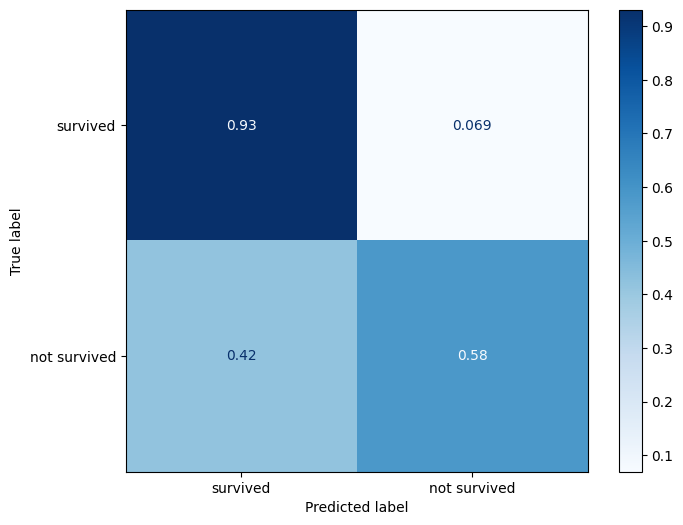

In [52]:
import matplotlib.pyplot as plt
cm = confusion_matrix(Y_test, prediction.reshape(-1,1), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
fig, ax = plt.subplots(figsize=(8,6))
disp.plot(ax=ax,cmap='Blues')

0.8251121076233184
              precision    recall  f1-score   support

    survived       0.83      0.91      0.87       144
not survived       0.80      0.67      0.73        79

    accuracy                           0.83       223
   macro avg       0.82      0.79      0.80       223
weighted avg       0.82      0.83      0.82       223



/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


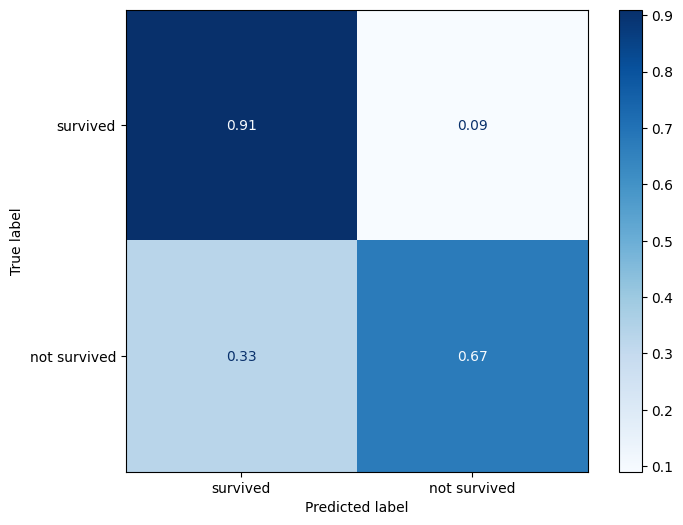

In [53]:
#KNN Algorithm STANDARD
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_train_norm , Y_train)

prediction =knn.predict(X_test_norm)

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, prediction)
print(accuracy)

target_names = ['survived','not survived']
print(classification_report(Y_test, prediction.reshape(-1,1), target_names=target_names))   # Reshaping is done to convert the data alignment from horizontal to vertical as excel representation

import matplotlib.pyplot as plt
cm = confusion_matrix(Y_test, prediction.reshape(-1,1), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
fig, ax = plt.subplots(figsize=(8,6))
disp.plot(ax=ax,cmap='Blues')

0.8116591928251121
              precision    recall  f1-score   support

    survived       0.83      0.90      0.86       144
not survived       0.78      0.66      0.71        79

    accuracy                           0.81       223
   macro avg       0.80      0.78      0.79       223
weighted avg       0.81      0.81      0.81       223



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


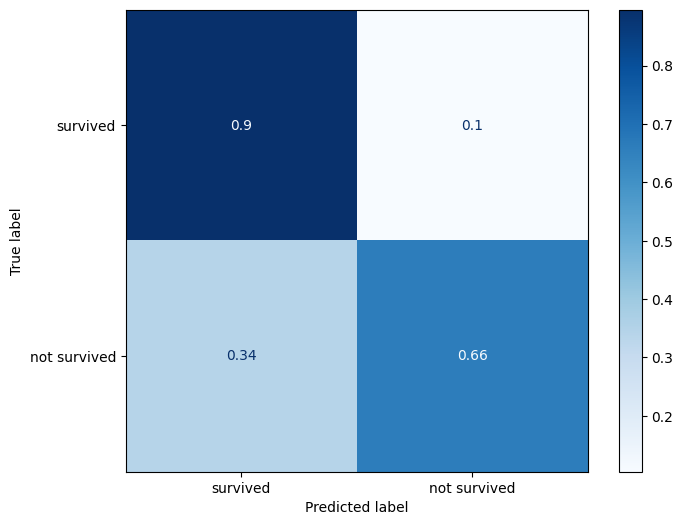

In [54]:
#SVM with MINMAX
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train_min, Y_train)

prediction = svc.predict(X_test_min)
prediction

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test , prediction)
print(accuracy)

target_names = ['survived','not survived']
print(classification_report(Y_test, prediction.reshape(-1,1), target_names=target_names))

import matplotlib.pyplot as plt
cm = confusion_matrix(Y_test, prediction.reshape(-1,1), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
fig, ax = plt.subplots(figsize=(8,6))
disp.plot(ax=ax,cmap='Blues')

0.8385650224215246
              precision    recall  f1-score   support

    survived       0.87      0.88      0.88       144
not survived       0.78      0.76      0.77        79

    accuracy                           0.84       223
   macro avg       0.82      0.82      0.82       223
weighted avg       0.84      0.84      0.84       223



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


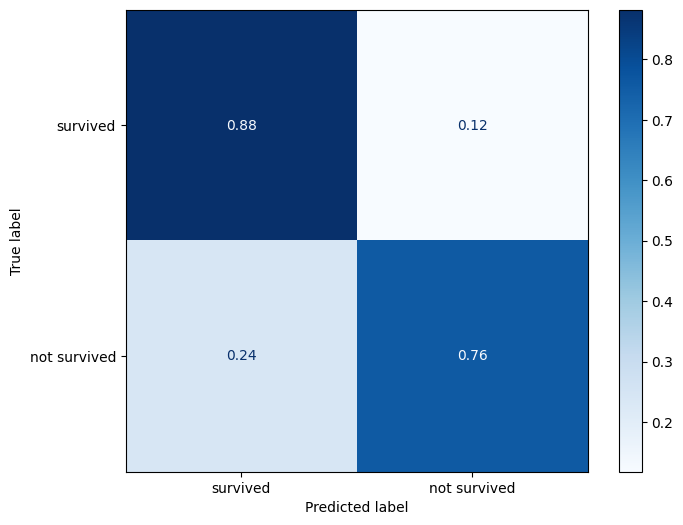

In [55]:
#SVM with STANDARD
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train_norm, Y_train)

prediction = svc.predict(X_test_norm)
prediction

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test , prediction)
print(accuracy)

target_names = ['survived','not survived']
print(classification_report(Y_test, prediction.reshape(-1,1), target_names=target_names))

import matplotlib.pyplot as plt
cm = confusion_matrix(Y_test, prediction.reshape(-1,1), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
fig, ax = plt.subplots(figsize=(8,6))
disp.plot(ax=ax,cmap='Blues')

0.757847533632287
              precision    recall  f1-score   support

    survived       0.84      0.78      0.81       144
not survived       0.64      0.72      0.68        79

    accuracy                           0.76       223
   macro avg       0.74      0.75      0.74       223
weighted avg       0.77      0.76      0.76       223



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


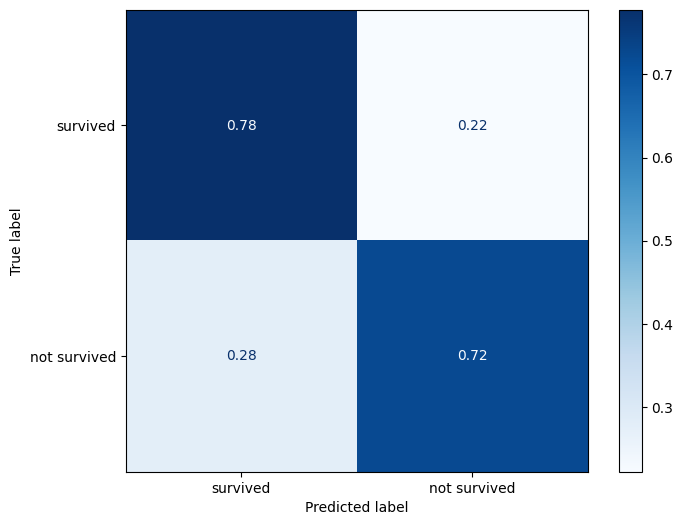

In [56]:
#Naive Bayes Gaussian with MINMAX
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train_min, Y_train)

prediction = model.predict(X_test_min)
prediction

from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, prediction)
print(accuracy)

target_names = ['survived','not survived']
print(classification_report(Y_test, prediction.reshape(-1,1), target_names=target_names))

cm = confusion_matrix(Y_test, prediction.reshape(-1,1), normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
fig, ax = plt.subplots(figsize=(8,6))
disp.plot(ax=ax,cmap='Blues')